In [30]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data_time = pd.read_csv("feature_matrix_1500.csv")


In [32]:
data_time['fault'] = pd.Categorical(data_time['fault'])

In [33]:
train, test = train_test_split(data_time, test_size = None, shuffle = True,
                                                    random_state = 324)

In [34]:
train.shape

(4113, 7)

In [35]:
test.shape

(1371, 7)

In [36]:
train.head()

,mean,rms,peak_to_peak,skewness,kurtosis,crest_factor,fault
2236,-0.114962,0.159740,1.054,0.050770,0.521637,2.673102,inner
4059,-0.115642,0.173683,2.248,0.054940,4.914969,6.085805,roller
5176,-0.002074,0.104139,1.067,-0.045320,0.766983,5.089362,outer
2735,-0.115233,0.170794,4.367,-0.404398,17.316321,11.832960,inner
679,-0.119218,0.155260,1.160,-0.044038,1.160155,2.801750,normal


In [37]:
train['fault'].value_counts()

normal    1143
roller    1117
inner     1109
outer      744
Name: fault, dtype: int64

In [38]:
test['fault'].value_counts()

inner     391
roller    383
normal    357
outer     240
Name: fault, dtype: int64

## Scaling data(standardization)

In [39]:
scaler = StandardScaler()
train_scaled= scaler.fit_transform(train.iloc[:,:-1])
test_scaled = (test.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

## Decision tree

In [41]:
sklearn.ensemble.RandomForestClassifier

NameError: name 'sklearn' is not defined

In [15]:
dt_clf = tree.DecisionTreeClassifier()

In [22]:
dt_clf.fit(train_scaled, train['fault'])

DecisionTreeClassifier()

In [23]:
train_predictions = dt_clf.predict(train_scaled)
test_predictions = dt_clf.predict(test_scaled)

## Confusion Matrices

In [24]:
train_confusion_matrix = confusion_matrix(train['fault'], train_predictions)
test_confusion_matrix = confusion_matrix(test['fault'], test_predictions)

## Acuracy Calculation

In [25]:
train_accuracy = accuracy_score(train['fault'], train_predictions)
print("Ovearll training accuracy: ", train_accuracy)

Ovearll training accuracy:  1.0


In [26]:
test_accuracy = accuracy_score(test['fault'], test_predictions)
print("Ovearll testing accuracy: ", test_accuracy)

Ovearll testing accuracy:  0.9773887673231219


## Heatmap Plot

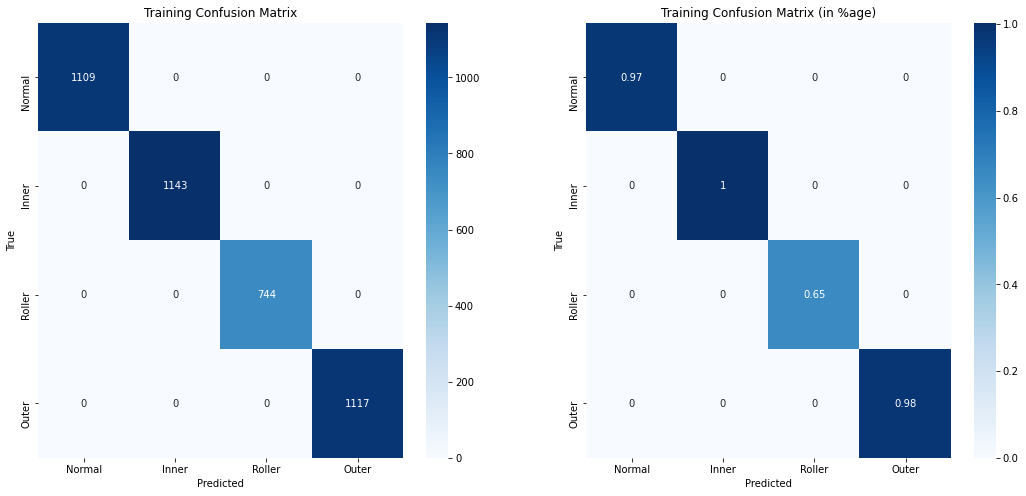

In [27]:
fault_type = ['Normal','Inner','Roller','Outer']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confusion_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

sns.heatmap(train_confusion_matrix/1140, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

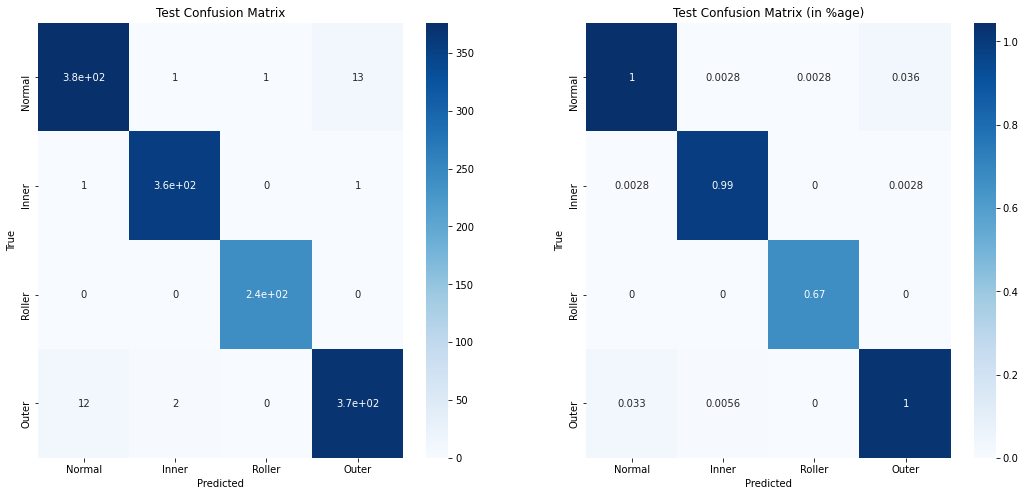

In [28]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confusion_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confusion_matrix/360, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()